<a href="https://colab.research.google.com/github/Sailappansivan/portfolio/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
url = 'https://raw.githubusercontent.com/emre-kocyigit/linear_regression/refs/heads/main/car_dataset.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head

<bound method NDFrame.head of       ID  symboling                      name fueltypes aspiration  \
0      1          3        alfa-romero giulia       gas        std   
1      2          3       alfa-romero stelvio       gas        std   
2      3          1  alfa-romero Quadrifoglio       gas        std   
3      4          2               audi 100 ls       gas        std   
4      5          2                audi 100ls       gas        std   
..   ...        ...                       ...       ...        ...   
200  201         -1           volvo 145e (sw)       gas        std   
201  202         -1               volvo 144ea       gas      turbo   
202  203         -1               volvo 244dl       gas        std   
203  204         -1                 volvo 246    diesel      turbo   
204  205         -1               volvo 264gl       gas      turbo   

    doornumbers      carbody drivewheels enginelocation  wheelbase  ...  \
0           two  convertible         rwd          front       88.6  ...   
1           two  convertible         rwd          front       88.6  ...   
2           two    hatchback         rwd          front       94.5  ...   
3          four        sedan         fwd          front       99.8  ...   
4          four        sedan         4wd          front       99.4  ...   
..          ...          ...         ...            ...        ...  ...   
200        four        sedan         rwd          front      109.1  ...   
201        four        sedan         rwd          front      109.1  ...   
202        four        sedan         rwd          front      109.1  ...   
203        four        sedan         rwd          front      109.1  ...   
204        four        sedan         rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]>

In [5]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
# assigning values to split the data
x = df["symboling"].values.reshape(-1 ,1)
y = df["price"].values.reshape(-1 , 1)

In [31]:
print(x,y)

[[ 3]
 [ 3]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 0]
 [ 2]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 2]
 [ 1]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 3]
 [ 2]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 0]
 [ 1]
 [ 0]
 [ 2]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 0]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [-1]
 [-1]
 [ 0]
 [-1]
 [-1]
 [ 3]
 [ 0]
 [ 1]
 [ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 3]
 [ 3]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 0]
 [ 2]
 [ 3]
 [ 2]
 [ 3]
 [ 2]
 [ 3]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 1

Text(0.5, 0, 'price')

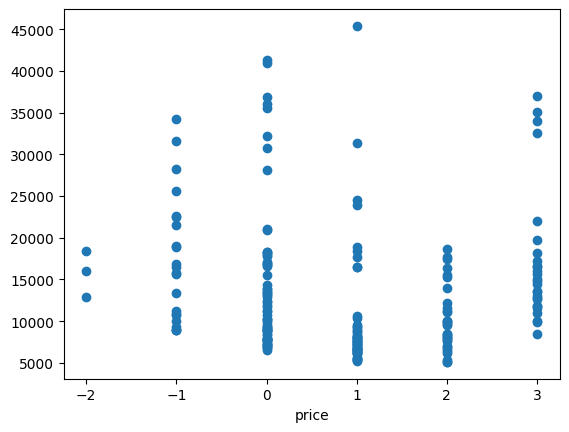

In [32]:
#plotting data
plt.scatter(x,y)
plt.xlabel("symboling")
plt.xlabel("price")

In [33]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(x ,y,random_state=23)
print(x_train.shape[0]/206 ,x_test.shape[0]/206)

0.7427184466019418 0.2524271844660194


In [34]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train ,y_train)

LinearRegression()

In [36]:
print('Weight Coefficients:',linear.coef_)
print('y-axis Intercept:',linear.intercept_)

Weight Coefficients: [[-832.7293121]]
y-axis Intercept: [13648.15057445]


In [39]:
linear.score(x_train,y_train)

0.018734410058829587

In [40]:
linear.score(x_test,y_test)

-0.03539256195150986

In [67]:
temp = np.array([row[0] for row in x]).reshape(-1, 1)
x_min = np.array([[temp.min()]])
x_max = np.array(([temp.max()]))
y_min = np.array([[temp.min()]])
y_max = np.array(([temp.max()]))
print(f"x,{x_min},{x_max}")
print(f"y,{y_min},{y_max}")
x_min = x_min.reshape(-1)
y_min = y_min.reshape(-1)

x,[[-2]],[3]
y,[[-2]],[3]


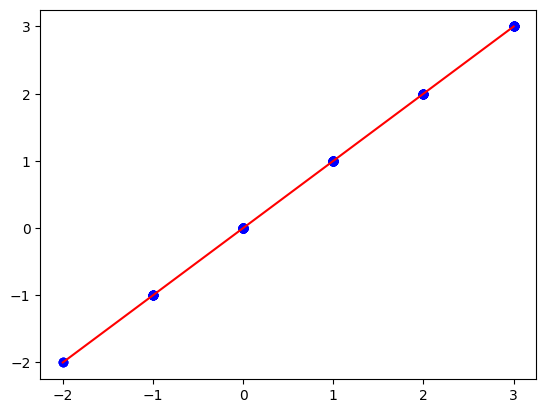

In [68]:
plt.scatter(temp, x,c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')